# Part 1 - Data Preprocessing

In [1]:
# Importing the libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

In [3]:
# importing the data
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#---[ Check the Null values Column vice ]---
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data = data.drop(['Cabin'],axis=1)
data = data.dropna()
#---[ Check the Null values Column vice ]---
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
x = data.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
y = data['Survived']
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
sex = pd.get_dummies(x['Sex'])
embarked = pd.get_dummies(x['Embarked'])
x = pd.concat([x,sex,embarked],axis=1)
x = x.drop(['Sex','Embarked'],axis=1)
x

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,1,0,0,1,0
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [8]:
data_len,feature_size = x.shape
x.shape

(712, 10)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2 - Now let's make the ANN

In [14]:
model = Sequential()
model.add(Input(shape=(feature_size,)))
model.add(Dense(11,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(13,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(13,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(5,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(9,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 11)                121       
_________________________________________________________________
dense_40 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_41 (Dense)             (None, 13)                156       
_________________________________________________________________
dense_42 (Dense)             (None, 5)                 70        
_________________________________________________________________
dense_43 (Dense)             (None, 11)                66        
_________________________________________________________________
dense_44 (Dense)             (None, 5)                 60        
_________________________________________________________________
dense_45 (Dense)             (None, 13)               

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 39ms/step - loss: 0.6492 - accuracy: 0.6004 - val_loss: 0.6769 - val_accuracy: 0.5701
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.6182 - accuracy: 0.6044 - val_loss: 0.6708 - val_accuracy: 0.5935
Epoch 3/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5810 - accuracy: 0.6707 - val_loss: 0.6561 - val_accuracy: 0.6589
Epoch 4/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5482 - accuracy: 0.7369 - val_loss: 0.6472 - val_accuracy: 0.6916
Epoch 5/100
16/16 [==============================] - 0s 11ms/step - loss: 0.5255 - accuracy: 0.7711 - val_loss: 0.6281 - val_accuracy: 0.7103
Epoch 6/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4964 - accuracy: 0.7932 - val_loss: 0.6218 - val_accuracy: 0.6963
Epoch 7/100
16/16 [==============================] - 0s 11ms/step - loss: 0.4771 - accuracy: 0.8032 - val_loss: 0.6165 - val_accuracy: 0.6963
Epoch 

16/16 [==============================] - 0s 11ms/step - loss: 0.2832 - accuracy: 0.8896 - val_loss: 0.7123 - val_accuracy: 0.7243
Epoch 59/100
16/16 [==============================] - 0s 12ms/step - loss: 0.2733 - accuracy: 0.8936 - val_loss: 0.6781 - val_accuracy: 0.7336
Epoch 60/100
16/16 [==============================] - 0s 11ms/step - loss: 0.2773 - accuracy: 0.8916 - val_loss: 0.7256 - val_accuracy: 0.7336
Epoch 61/100
16/16 [==============================] - 0s 11ms/step - loss: 0.2765 - accuracy: 0.8896 - val_loss: 0.7228 - val_accuracy: 0.7009
Epoch 62/100
16/16 [==============================] - 0s 11ms/step - loss: 0.2744 - accuracy: 0.8976 - val_loss: 0.7153 - val_accuracy: 0.7383
Epoch 63/100
16/16 [==============================] - 0s 11ms/step - loss: 0.2754 - accuracy: 0.8956 - val_loss: 0.7477 - val_accuracy: 0.7290
Epoch 64/100
16/16 [==============================] - 0s 12ms/step - loss: 0.2751 - accuracy: 0.8876 - val_loss: 0.7248 - val_accuracy: 0.7009
Epoch 65/100

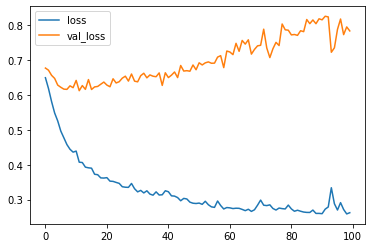

In [16]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

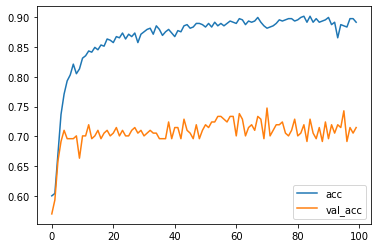

In [17]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [45]:
# Part 3 - Making the predictions and evaluating the model

In [19]:
# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
#print(y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

[[99 26]
 [35 54]]
0.7149532710280374
